In [51]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

In [2]:
# Using double backslashes
apple_file_path = 'D:\\\\BelajarML\\\\dataset\\\\apple_quality.csv'
apple_data = pd.read_csv(apple_file_path)
apple_data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
apple_data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [4]:
apple_data.drop_duplicates()
apple_data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [5]:
apple_data[apple_data.duplicated()]


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


In [6]:
apple_data.dropna()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [7]:
apple_data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

# Visual

<Axes: xlabel='A_id', ylabel='Size'>

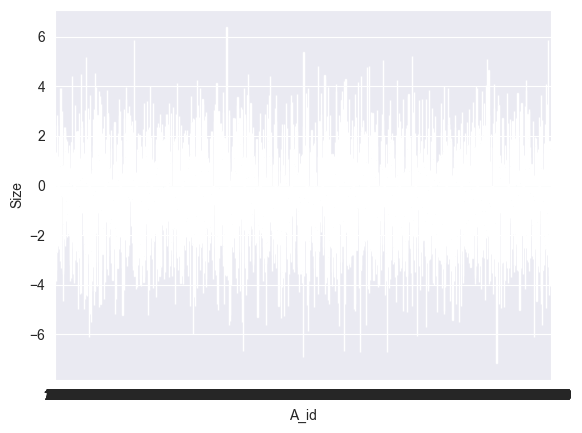

In [8]:
sns.barplot(data=apple_data, x='A_id', y='Size')

In [9]:
#tentukan akurasi apel
apple_data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

<Axes: xlabel='A_id', ylabel='Size'>

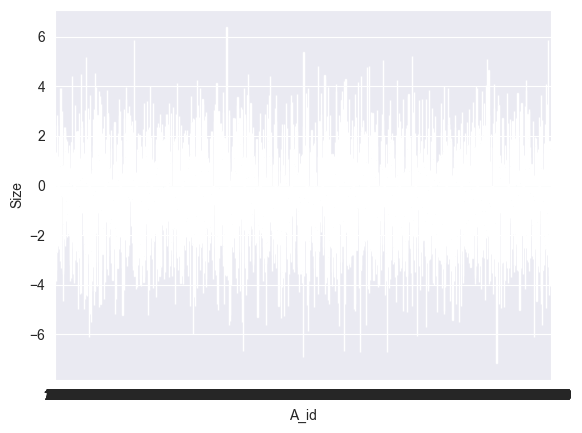

In [26]:
sns.barplot(apple_data, x='A_id', y='Size')

In [11]:
apple_data.isnull()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3996,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False
3999,False,False,False,False,False,False,False,False,False


In [12]:
apple_data_non_mis = apple_data.dropna()
apple_data_non_mis

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [13]:
apple_data_non_mis.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [14]:
apple_data_non_mis[apple_data_non_mis.duplicated()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


In [15]:
le = LabelEncoder()
apple_data_non_mis['Quality'] = le.fit_transform(apple_data_non_mis['Quality'])
apple_data_non_mis['Quality'].unique()
apple_data_non_mis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14500\3653743302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data_non_mis['Quality'] = le.fit_transform(apple_data_non_mis['Quality'])


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


# Feature Scaling with MinMax Scaler

In [16]:
mms = MinMaxScaler()
apple_data_scaled = mms.fit_transform(apple_data_non_mis)
apple_data_scaled = pd.DataFrame(apple_data_scaled, columns=apple_data_non_mis.columns)
apple_data_scaled

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.00000,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,1.0
1,0.00025,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,1.0
2,0.00050,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,0.0
3,0.00075,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,1.0
4,0.00100,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,1.0
...,...,...,...,...,...,...,...,...,...
3995,0.99900,0.531867,0.470029,0.239644,0.477379,0.574794,0.618866,0.495885,0.0
3996,0.99925,0.505867,0.703146,0.504203,0.395971,0.449218,0.364566,0.614957,1.0
3997,0.99950,0.333173,0.387278,0.335661,0.490846,0.612443,0.811182,0.393744,0.0
3998,0.99975,0.231869,0.415014,0.697913,0.428137,0.609571,0.463966,0.331650,1.0


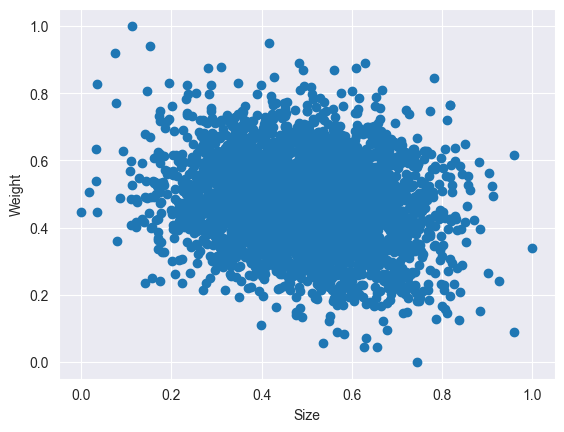

In [35]:
fig, ax = plt.subplots()

ax.scatter(apple_data_scaled['Size'], apple_data_scaled['Weight'])
plt.xlabel("Size")
plt.ylabel("Weight")
plt.show()

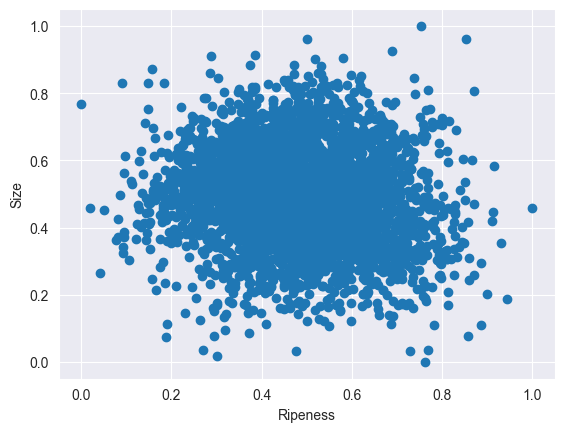

In [36]:
fig, ax = plt.subplots()

ax.scatter(apple_data_scaled['Ripeness'], apple_data_scaled['Size'])
plt.xlabel("Ripeness")
plt.ylabel("Size")
plt.show()

In [19]:
reg = linear_model.LinearRegression()
reg.fit(X=apple_data_scaled, y=apple_data_scaled['Weight'])

LinearRegression()

In [20]:
apple_data_scaled['Quality'] = apple_data_scaled['Quality'].astype(int)
apple_data_scaled

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.00000,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,1
1,0.00025,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,1
2,0.00050,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,0
3,0.00075,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,1
4,0.00100,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,1
...,...,...,...,...,...,...,...,...,...
3995,0.99900,0.531867,0.470029,0.239644,0.477379,0.574794,0.618866,0.495885,0
3996,0.99925,0.505867,0.703146,0.504203,0.395971,0.449218,0.364566,0.614957,1
3997,0.99950,0.333173,0.387278,0.335661,0.490846,0.612443,0.811182,0.393744,0
3998,0.99975,0.231869,0.415014,0.697913,0.428137,0.609571,0.463966,0.331650,1


In [27]:
correlation = apple_data_scaled.select_dtypes("number").drop(columns="Quality").corr()
correlation.corr()
# sns.heatmap(correlation)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
A_id,1.000000,-0.140683,-0.035633,-0.039552,-0.108456,-0.094754,0.030321,-0.235676
Size,-0.140683,1.000000,-0.255200,-0.516588,0.318170,-0.100484,-0.164957,0.269130
Weight,-0.035633,-0.255200,1.000000,-0.174236,-0.144338,-0.157256,-0.332621,-0.037764
Sweetness,-0.039552,-0.516588,-0.174236,1.000000,-0.095268,0.200968,-0.391119,0.109561
Crunchiness,-0.108456,0.318170,-0.144338,-0.095268,1.000000,-0.508801,-0.316318,0.035027
Juiciness,-0.094754,-0.100484,-0.157256,0.200968,-0.508801,1.000000,-0.153964,0.354205
Ripeness,0.030321,-0.164957,-0.332621,-0.391119,-0.316318,-0.153964,1.000000,-0.442636
Acidity,-0.235676,0.269130,-0.037764,0.109561,0.035027,0.354205,-0.442636,1.000000


<Axes: >

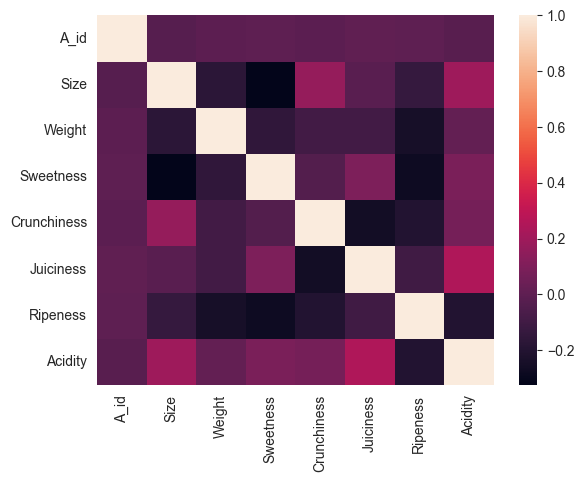

In [32]:
sns.heatmap(correlation)

# Splitting data  into training and testing 

In [56]:
#Memisahkan fitur dan label
X_data = apple_data_scaled.drop(columns=['Quality'])
Y_label = apple_data_scaled['Quality']

#Membagi dataset menjadi data latihan dan pengujian
X_train, X_testing, Y_train, Y_testing = train_test_split(X_data, Y_label, test_size=50, random_state=42)

# Memeriksa dimensi dari data latihan dan pengujian
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_testing:", X_testing.shape)
print("Dimensi Y_train:", Y_train.shape)
print("Dimensi Y_testing:", Y_testing.shape)

Dimensi X_train: (3950, 8)
Dimensi X_testing: (50, 8)
Dimensi Y_train: (3950,)
Dimensi Y_testing: (50,)


# Akurasi dari Knn

In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_testing)
accuracy = accuracy_score(Y_testing, y_pred)
print("Accurary : " , accuracy)

Accurary :  0.84


ValueError: Filler values must be provided when X has more than 2 training features.

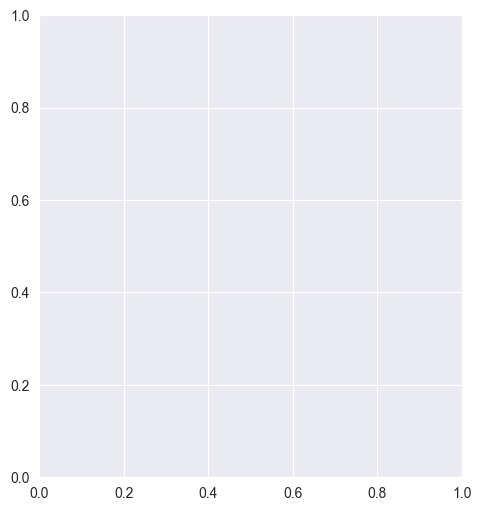

In [59]:
# def knn_comparison(data, k):
#     X_data = data.drop(columns=['Quality']).values
#     Y_label = data['Quality'].values
#     knn = KNeighborsClassifier(n_neighbors=3)
#     knn.fit(X_data, Y_label)
#     plot_decision_regions(X_data, Y_label, clf=knn, legend=2)
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Knn with K=' + str(k))
#     plt.show()
# 
# 
# for i in range (1,11):
#     knn_comparison(apple_data_scaled,i)